In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Adds.csv')


### ***Data Preprocessing***

---



---



In [3]:
df.head(15)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Page Views,Activity
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 0:53:11,0,NaN,NaN
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 1:39:02,0,NaN,NaN
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,NaN,NaN
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 2:31:19,0,NaN,NaN
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 3:36:18,0,NaN,NaN
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0,NaN,NaN
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0,NaN,NaN
7,66.00,48,24593.33,269.96,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 1:40:15,1,3.0,Purchase
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 9:33:42,0,NaN,NaN
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 1:42:51,0,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
 10  Page Views                500 non-null    float64
 11  Activity                  500 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 93.9+ KB


In [5]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Page Views
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,500.000000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000,10.562000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025,5.677202
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000,1.000000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000,6.000000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000,11.000000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000,15.000000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000,20.000000


In [6]:
df.isnull().sum()

,0
Daily Time Spent on Site,0
Age,0
Area Income,0
Daily Internet Usage,0
Ad Topic Line,0
City,0
Male,0
Country,0
Timestamp,0
Clicked on Ad,0


In [7]:
l = ['Male','Activity','Page Views','Clicked on Ad'  ]
for i in l:
  print(df[i].value_counts())

Male
0    519
1    481
Name: count, dtype: int64
Activity
Click       179
View        164
Purchase    157
Name: count, dtype: int64
Page Views
14.0    38
15.0    34
8.0     32
9.0     30
5.0     28
2.0     27
17.0    25
13.0    25
12.0    25
20.0    25
1.0     24
16.0    23
6.0     22
3.0     22
7.0     21
4.0     21
19.0    21
18.0    20
11.0    19
10.0    18
Name: count, dtype: int64
Clicked on Ad
0    500
1    500
Name: count, dtype: int64


In [8]:
### Missing values

df['Page Views'].fillna(0, inplace = True)
df.head(10)


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Page Views,Activity
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 0:53:11,0,0.0,NaN
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 1:39:02,0,0.0,NaN
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,0.0,NaN
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 2:31:19,0,0.0,NaN
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 3:36:18,0,0.0,NaN
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0,0.0,NaN
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0,0.0,NaN
7,66.00,48,24593.33,269.96,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 1:40:15,1,3.0,Purchase
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 9:33:42,0,0.0,NaN
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 1:42:51,0,0.0,NaN


In [9]:
df['Activity'].fillna('NoView', inplace = True)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
 10  Page Views                1000 non-null   float64
 11  Activity                  1000 non-null   object 
dtypes: float64(4), int64(3), object(5)
memory usage: 93.9+ KB


In [11]:
df.columns = df.columns.str.replace(' ', '')
df.columns

Index(['DailyTimeSpentonSite', 'Age', 'AreaIncome', 'DailyInternetUsage',
       'AdTopicLine', 'City', 'Male', 'Country', 'Timestamp', 'ClickedonAd',
       'PageViews', 'Activity'],
      dtype='object')

In [12]:
df = df.drop('Timestamp', axis =1 )

In [13]:
df.head(10)

,DailyTimeSpentonSite,Age,AreaIncome,DailyInternetUsage,AdTopicLine,City,Male,Country,ClickedonAd,PageViews,Activity
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0,0.0,NoView
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0,0.0,NoView
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0,0.0,NoView
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0,0.0,NoView
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,0,0.0,NoView
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,0,0.0,NoView
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,0,0.0,NoView
7,66.00,48,24593.33,269.96,Reactive local challenge,Port Jefferybury,1,Australia,1,3.0,Purchase
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,0,0.0,NoView
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,0,0.0,NoView


In [14]:
print(len(df.City.unique()))
print(len(df.AdTopicLine.unique()))

969
1000


### ***EDA***

---



---



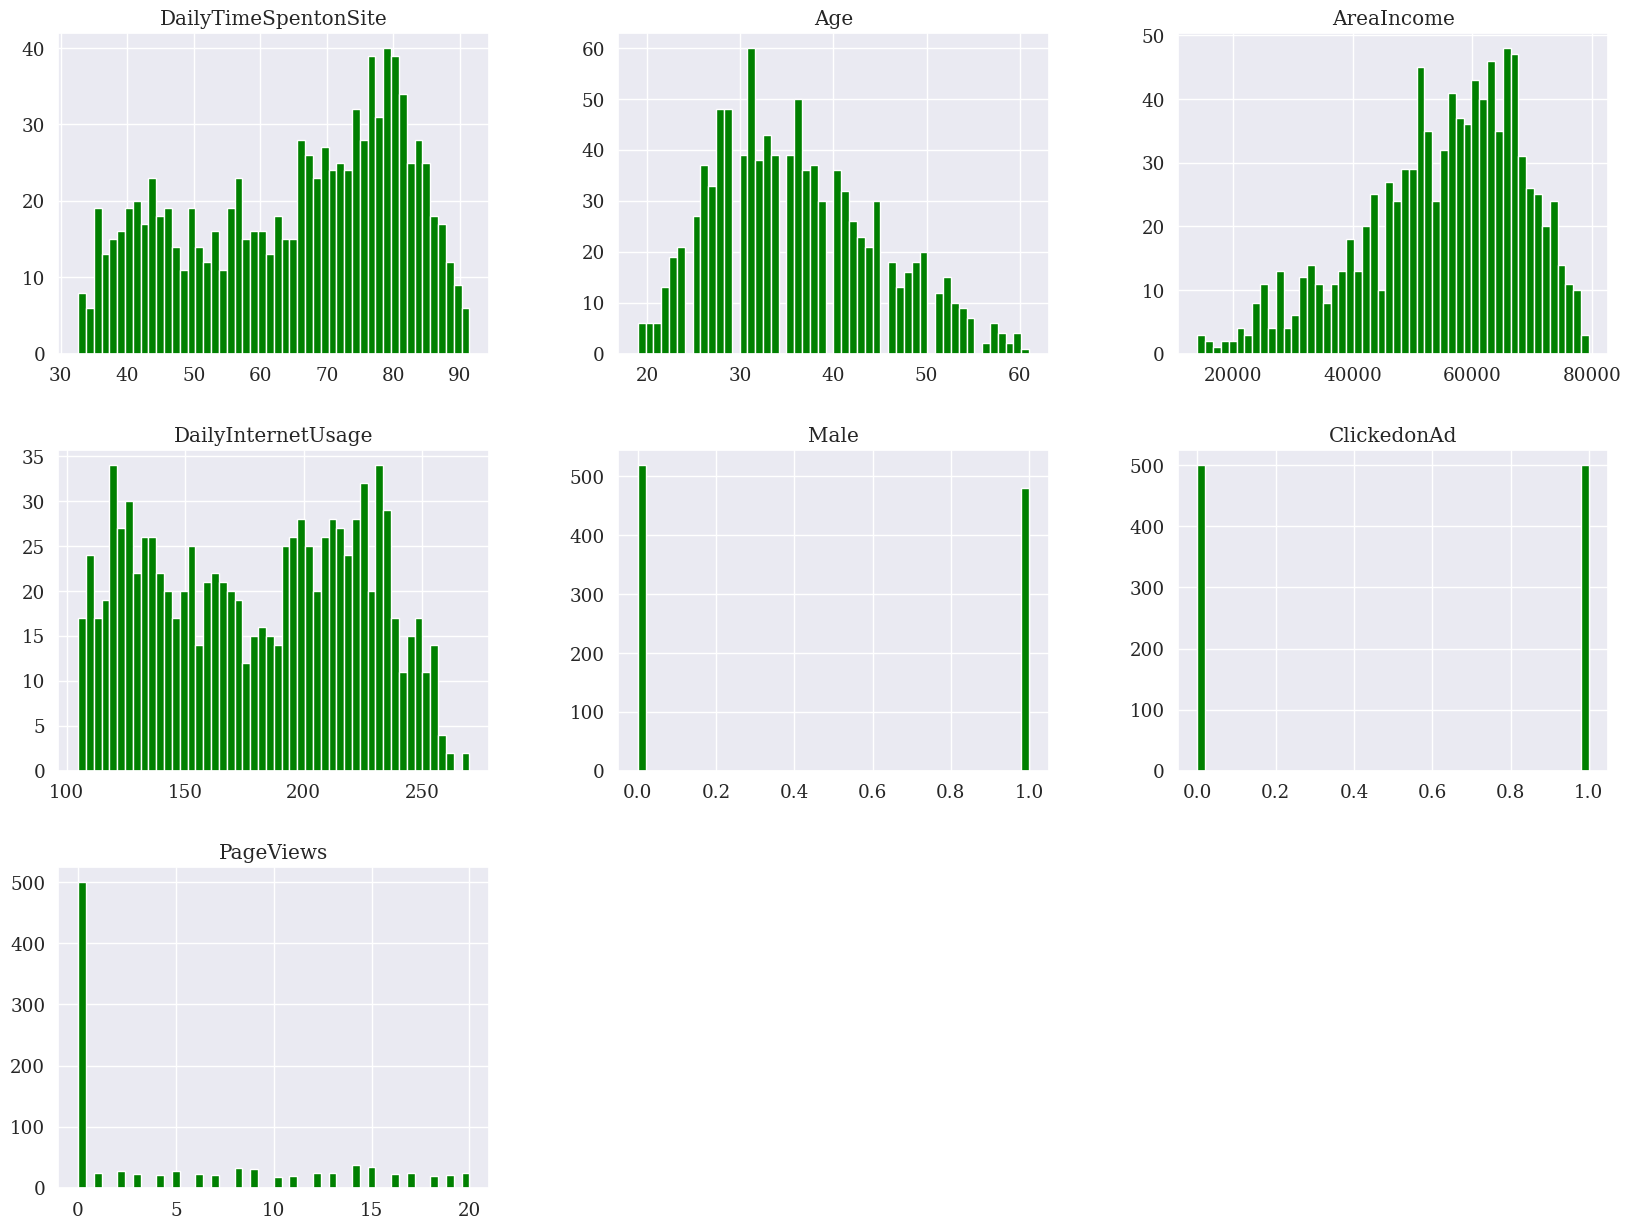

In [15]:
sns.set_theme()
sns.set(font="serif", font_scale=1.2)
df.hist( bins= 50, figsize=(20,15), color ="green")
plt.show()

<Axes: xlabel='AreaIncome', ylabel='Count'>

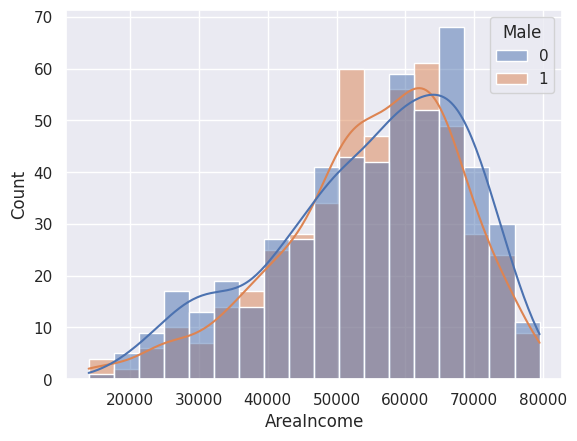

In [16]:
sns.set_theme()
sns.histplot(df,x='AreaIncome', hue ='Male', kde= True)

<Axes: xlabel='DailyTimeSpentonSite', ylabel='Count'>

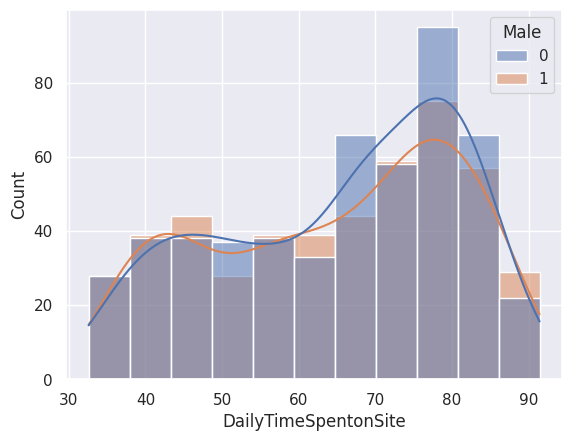

In [17]:
sns.histplot(df,x='DailyTimeSpentonSite', hue ='Male', kde= True)

<Axes: xlabel='Age', ylabel='Count'>

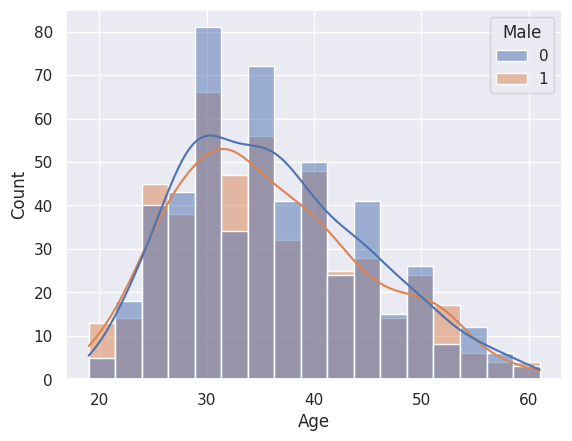

In [18]:
sns.histplot(df, x='Age', hue = 'Male' , kde= True)

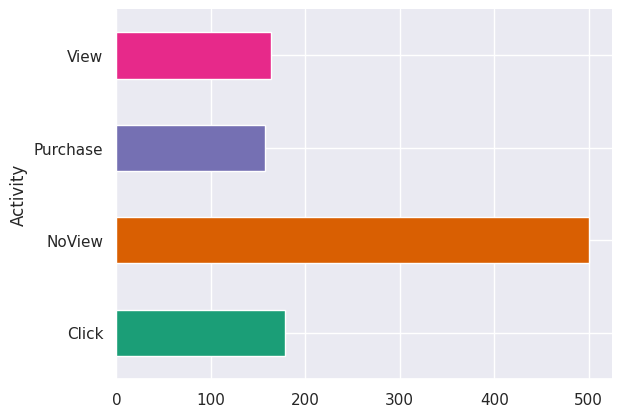

In [19]:
df.groupby('Activity').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

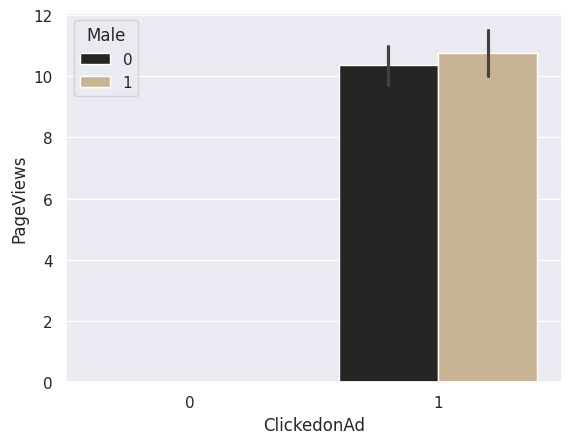

In [20]:
sns.barplot(x='ClickedonAd', y='PageViews', hue = 'Male', data=df, palette='dark:tan')
plt.show()

<Axes: xlabel='DailyInternetUsage', ylabel='Density'>

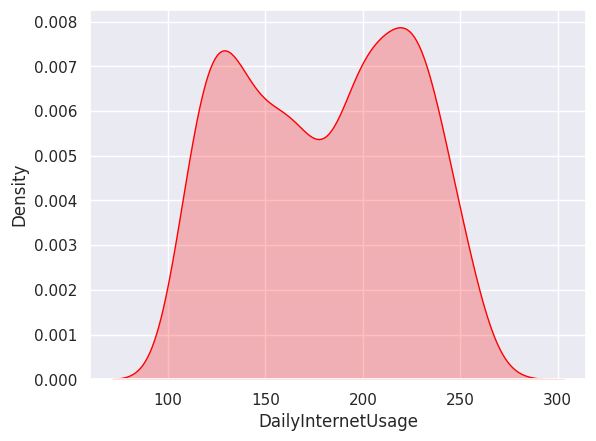

In [21]:
sns.kdeplot(df['DailyInternetUsage'], fill = True, color = "red")


<Axes: xlabel='DailyTimeSpentonSite', ylabel='Density'>

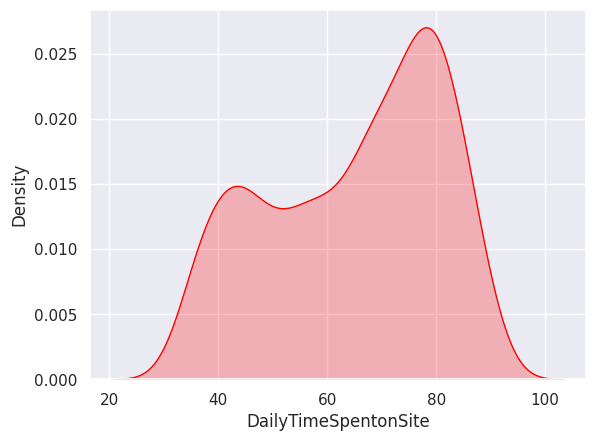

In [22]:
sns.kdeplot(df['DailyTimeSpentonSite'], fill = True, color = "red")

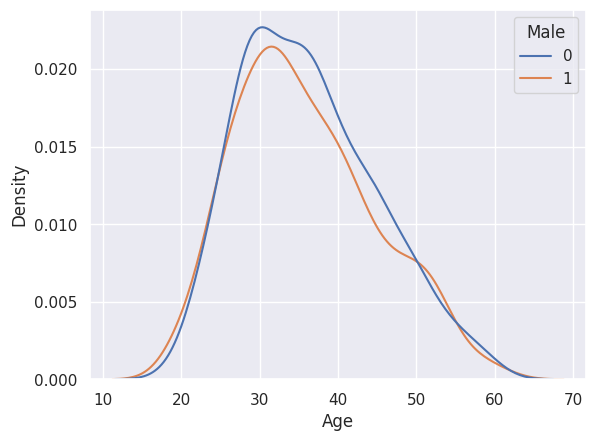

In [23]:
sns.kdeplot(x= "Age", hue = "Male", data = df)
plt.show()

<Axes: xlabel='DailyTimeSpentonSite', ylabel='AreaIncome'>

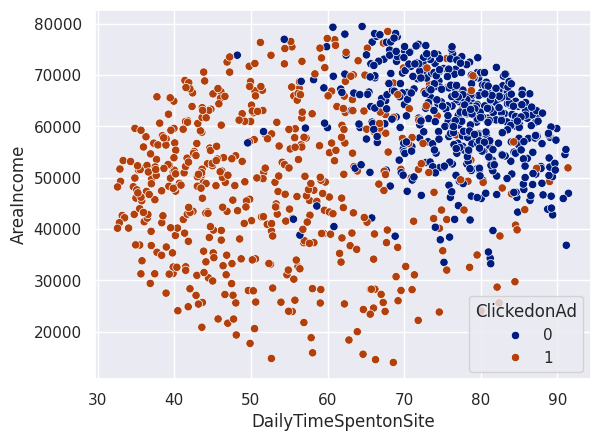

In [24]:
sns.scatterplot(x = 'DailyTimeSpentonSite', y = 'AreaIncome', data = df, hue= 'ClickedonAd', palette = 'dark' )

<Axes: xlabel='DailyTimeSpentonSite', ylabel='DailyInternetUsage'>

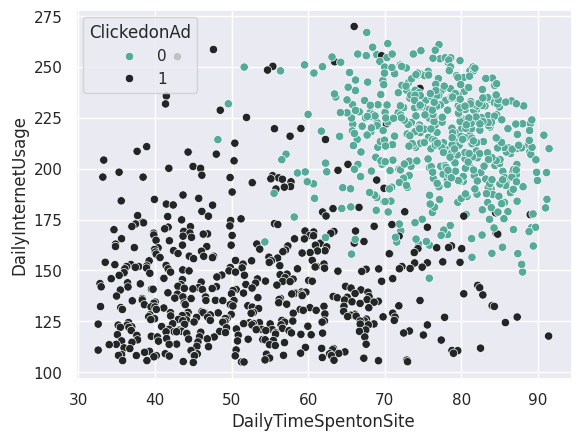

In [25]:
sns.scatterplot(x= 'DailyTimeSpentonSite', y = 'DailyInternetUsage', data = df, hue = 'ClickedonAd', palette = 'dark:#5A9_r')

<Axes: xlabel='Age', ylabel='AreaIncome'>

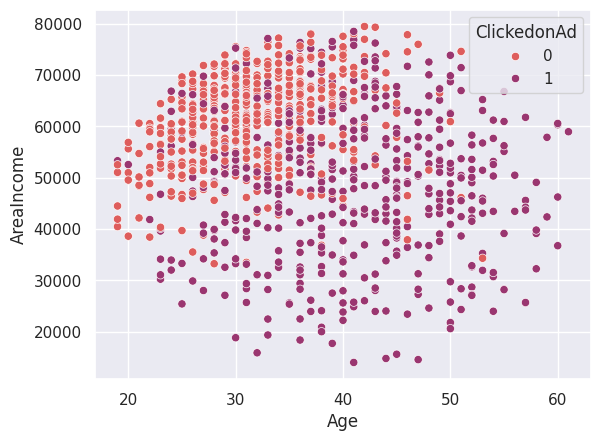

In [26]:
sns.scatterplot(x= 'Age', y = 'AreaIncome', data = df, hue = 'ClickedonAd', palette= 'flare')

<Axes: xlabel='PageViews', ylabel='AreaIncome'>

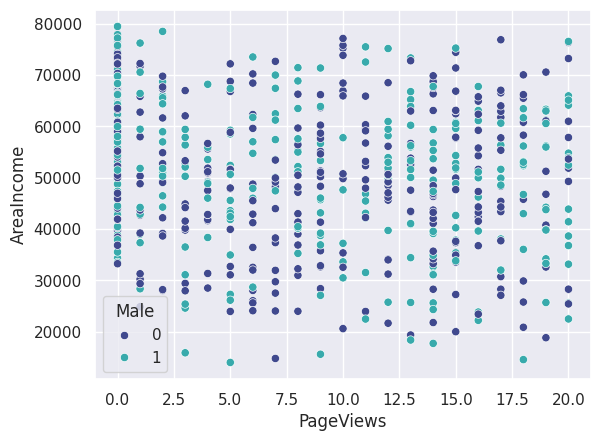

In [27]:
sns.scatterplot(x= 'PageViews', y = 'AreaIncome', data = df, hue = 'Male', palette= 'mako')

<Axes: xlabel='Activity', ylabel='PageViews'>

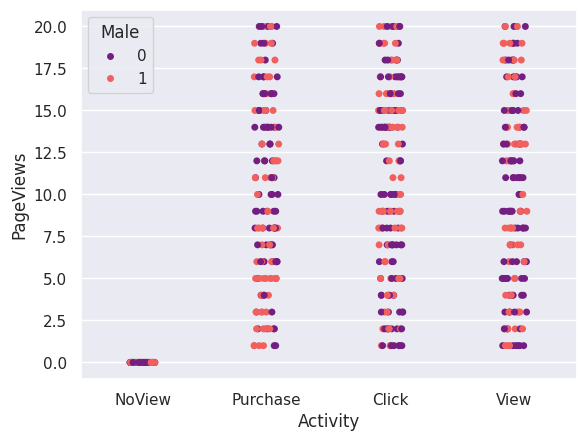

In [28]:
sns.stripplot(x='Activity', y='PageViews', data=df, hue = 'Male', palette = 'magma')

<Axes: xlabel='Activity', ylabel='AreaIncome'>

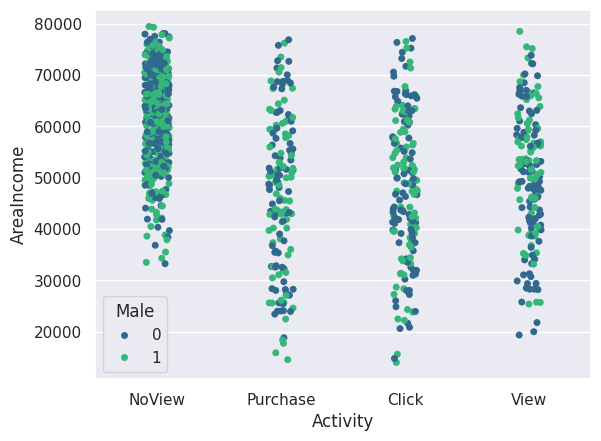

In [29]:
sns.stripplot(x='Activity', y='AreaIncome', data=df, hue = 'Male', palette= 'viridis')

### ***User segmentation***

---



---



In [76]:
cl_data = df.drop(['City','Country' ], axis = 1)

In [79]:
cl_data.drop('AdTopicLine', axis = 1, inplace = True)


In [80]:
cl_data

,DailyTimeSpentonSite,Age,AreaIncome,DailyInternetUsage,Male,ClickedonAd,PageViews,Activity
0,68.95,35,61833.90,256.09,0,0,0.0,NoView
1,80.23,31,68441.85,193.77,1,0,0.0,NoView
2,69.47,26,59785.94,236.50,0,0,0.0,NoView
3,74.15,29,54806.18,245.89,1,0,0.0,NoView
4,68.37,35,73889.99,225.58,0,0,0.0,NoView
...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,105.15,1,1,9.0,Click
996,51.30,45,67782.17,105.04,1,1,14.0,Click
997,51.63,51,42415.72,105.00,1,1,5.0,Click
998,55.55,19,41920.79,187.95,0,0,0.0,NoView


In [83]:
le2 = LabelEncoder()
cl_data['Activity'] = le2.fit_transform(cl_data['Activity'])

In [85]:
scaler = StandardScaler()
cl_data = scaler.fit_transform(cl_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

Number of clusters: 2, Inertia: 4608.103799413307, Silhouette: 0.3982410141151486
Number of clusters: 3, Inertia: 3798.0442558309287, Silhouette: 0.39137437132398645
Number of clusters: 4, Inertia: 3294.407826381516, Silhouette: 0.31129738564996634
Number of clusters: 5, Inertia: 2968.2783469825677, Silhouette: 0.29825441198288705
Number of clusters: 6, Inertia: 2814.084454296862, Silhouette: 0.28978104077877587
Number of clusters: 7, Inertia: 2666.974078635791, Silhouette: 0.2831243280970347
Number of clusters: 8, Inertia: 2532.7177183515705, Silhouette: 0.2501413657482786


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 9, Inertia: 2436.6217966325885, Silhouette: 0.24804610895473625
Number of clusters: 10, Inertia: 2358.0400317548438, Silhouette: 0.23374461730457768
Number of clusters: 11, Inertia: 2258.413260609693, Silhouette: 0.20398688025171746


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 12, Inertia: 2186.7690216735145, Silhouette: 0.2006268766724397
Number of clusters: 13, Inertia: 2124.927650707632, Silhouette: 0.20236165302520173
Number of clusters: 14, Inertia: 2051.328346236037, Silhouette: 0.1959327174082439


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 15, Inertia: 1991.2015821474831, Silhouette: 0.19304054457027506
Number of clusters: 16, Inertia: 1937.2883307381599, Silhouette: 0.19704676706706967
Number of clusters: 17, Inertia: 1889.4148580000679, Silhouette: 0.2008607932237183


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 18, Inertia: 1822.416873197221, Silhouette: 0.20148533633872018


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 19, Inertia: 1782.6145261083004, Silhouette: 0.19678549349283878
Number of clusters: 20, Inertia: 1750.185623572737, Silhouette: 0.19018908992555575


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 21, Inertia: 1683.4462005172602, Silhouette: 0.20270137586590056
Number of clusters: 22, Inertia: 1681.1122167447118, Silhouette: 0.19089291022436755


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 23, Inertia: 1633.1195851704458, Silhouette: 0.20116251811760105
Number of clusters: 24, Inertia: 1605.0638425287457, Silhouette: 0.1915105192284742


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 25, Inertia: 1572.4466531907415, Silhouette: 0.19387735016659702


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 26, Inertia: 1555.519200973807, Silhouette: 0.19577557753696817
Number of clusters: 27, Inertia: 1525.5996865978773, Silhouette: 0.19097197008586186


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 28, Inertia: 1513.9883958848557, Silhouette: 0.19787786202009125

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 29, Inertia: 1472.841753136013, Silhouette: 0.19358910192487064


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 30, Inertia: 1438.5159486688306, Silhouette: 0.18949956191211598


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 31, Inertia: 1421.4692738291774, Silhouette: 0.19464030242479516


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 32, Inertia: 1409.919285894506, Silhouette: 0.19805210162139683


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 33, Inertia: 1374.938689375328, Silhouette: 0.18883320038817356


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 34, Inertia: 1349.8723655379254, Silhouette: 0.19721994757510042


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 35, Inertia: 1334.0261692240201, Silhouette: 0.1930726592675121


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 36, Inertia: 1318.098190725977, Silhouette: 0.1937633790122251


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 37, Inertia: 1304.749451240465, Silhouette: 0.20117670763557277


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 38, Inertia: 1279.9802404943296, Silhouette: 0.1984844769801134


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 39, Inertia: 1278.9810405133287, Silhouette: 0.2012269520297567


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 40, Inertia: 1255.7292367400787, Silhouette: 0.19770417800419463


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 41, Inertia: 1221.532350318939, Silhouette: 0.19624315720148477
Number of clusters: 42, Inertia: 1215.8916567686983, Silhouette: 0.20314856317667676


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 43, Inertia: 1194.3611745796775, Silhouette: 0.19403326446323318
Number of clusters: 44, Inertia: 1178.4083928526377, Silhouette: 0.1985037900102875


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 45, Inertia: 1161.314912273248, Silhouette: 0.20185359401374137
Number of clusters: 46, Inertia: 1156.1092965030239, Silhouette: 0.1985554115938076


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 47, Inertia: 1155.2169131832977, Silhouette: 0.19541137247618434
Number of clusters: 48, Inertia: 1113.8213542916544, Silhouette: 0.20528125761517269


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 49, Inertia: 1117.93810214619, Silhouette: 0.20267336077840942


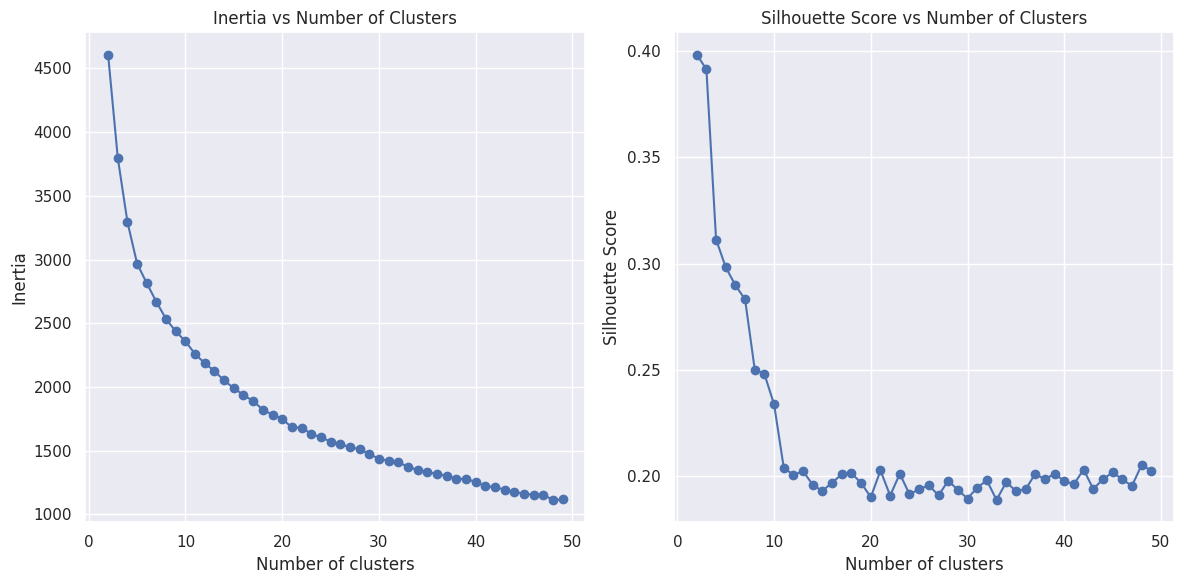

In [95]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Initialize lists to store the inertia and silhouette scores
inertia_values = []
silhouette_scores = []

# Iterate over the range of cluster numbers
for n_clusters in range(2, 50):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(cl_data)
    labels = kmeans.labels_

    inertia = kmeans.inertia_
    silhouette_avg = silhouette_score(cl_data, labels)

    inertia_values.append(inertia)
    silhouette_scores.append(silhouette_avg)

    print(f"Number of clusters: {n_clusters}, Inertia: {inertia}, Silhouette: {silhouette_avg}")

# Plot inertia values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(2, 50), inertia_values, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Clusters')

# Plot silhouette scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 50), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')

plt.tight_layout()
plt.show()


In [96]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(cl_data)
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


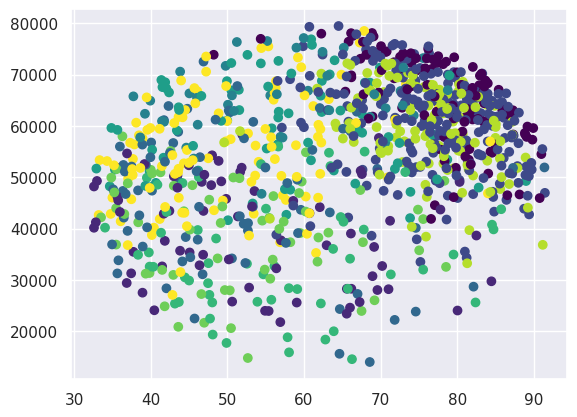

In [100]:
plt.scatter(df['DailyTimeSpentonSite'], df['AreaIncome'], c=labels, cmap='viridis')

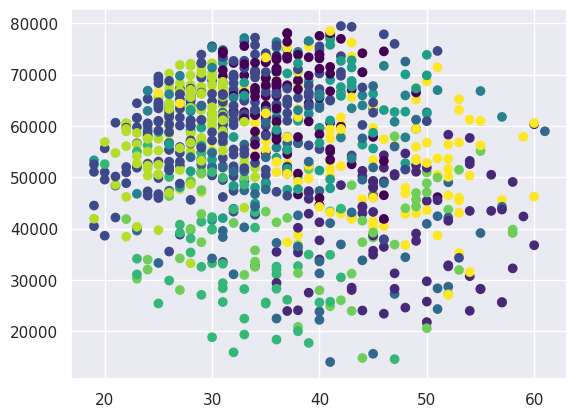

In [103]:
plt.scatter(df['Age'], df['AreaIncome'], c=labels, cmap='viridis')

### ***Lemmatization***

In [30]:
Adtopic_lemma = df['AdTopicLine'].values

In [31]:
lemmatizer = WordNetLemmatizer()

In [32]:
for i in range (len(Adtopic_lemma)) :

  words = re.sub('[^a-zA-z]', ' ', Adtopic_lemma[i])
  words = words.lower()
  words  = words.split()
  words = [lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
  Adtopic_lemma[i] =  ' '.join(words) ### Converting the words back to sentences

### ***Data Split***

---



---



In [33]:
X = df.drop(['DailyInternetUsage', 'City', 'ClickedonAd', 'Country', 'AdTopicLine'], axis = 1)
y = df['ClickedonAd']

In [34]:
X['Adtopic'] = Adtopic_lemma

In [35]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20)

In [36]:
X_train.shape

(800, 7)

In [37]:
X_test.shape

(200, 7)

### ***Vectorization***

---



---



In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [39]:
Vectorizer = TfidfVectorizer(max_features = 2500 , ngram_range=(1, 2))

In [43]:
X_train_tfidf = Vectorizer.fit_transform(X_train['Adtopic'])
X_test_tfidf = Vectorizer.transform(X_test['Adtopic'])

In [44]:
X_train_tfidf_dense = X_train_tfidf.toarray()
X_test_tfidf_dense = X_test_tfidf.toarray()

In [47]:
X_train_tfidf_df = pd.DataFrame(X_train_tfidf_dense, index=X_train.index, columns=Vectorizer.get_feature_names_out())
X_test_tfidf_df = pd.DataFrame(X_test_tfidf_dense, index=X_test.index, columns=Vectorizer.get_feature_names_out())


In [48]:
X_train_combined = pd.concat([X_train.drop(columns=['Adtopic']), X_train_tfidf_df], axis=1)
X_test_combined = pd.concat([X_test.drop(columns=['Adtopic']), X_test_tfidf_df], axis=1)


### ***Label Encoding***

---



---



In [54]:
le = LabelEncoder()

In [58]:
X_train_combined['Activity'] = le.fit_transform(X_train_combined['Activity'])

In [61]:
X_test_combined['Activity'] = le.transform(X_test_combined['Activity'])

### ***Model Training***

In [66]:
models = [ RandomForestClassifier(), MultinomialNB(), KNeighborsClassifier(), SVC(), DecisionTreeClassifier(), LogisticRegression() ]

for model in models:
  model.fit(X_train_combined, y_train )
  y_pred = model.predict(X_test_combined)

  print(model, '\nConfusion matrix \n', confusion_matrix(y_pred,y_test))
  print('Score' , accuracy_score(y_pred,y_test))
  print('Report', classification_report(y_pred,y_test))
  print('--------------------------------------------------')


RandomForestClassifier() 
Confusion matrix 
 [[100   0]
 [  0 100]]
Score 1.0
Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

--------------------------------------------------
MultinomialNB() 
Confusion matrix 
 [[99  4]
 [ 1 96]]
Score 0.975
Report               precision    recall  f1-score   support

           0       0.99      0.96      0.98       103
           1       0.96      0.99      0.97        97

    accuracy                           0.97       200
   macro avg       0.97      0.98      0.97       200
weighted avg       0.98      0.97      0.98       200

--------------------------------------------------
KNeighborsClassifier() 
Confusion matrix 
 [[76 37]
 [24 63]]
Score 0.695
Report     